# Titanic Survival Analysis Project by Hui Xu 

## Summary

In this report, we will take advantage of the titanic data and answer the following questions:
1. what's the titanic passengers' distribution?
2. Is passenger survival related to other variables, such as the passenger's gender, class and age?

## Data Loading and Wrangling

In [285]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic= pd.read_csv('/Users/HuiXu/Desktop/Udacity/Data_Analysis/titanic_data.csv')

In [166]:
#see the variable of dataframe
print len(titanic)
print titanic.head()
print titanic.tail()
titanic.dtypes

891
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [167]:
# convert data type of survived to boolean and Pclass to object
titanic['Survived'] = titanic['Survived'].astype(bool)
titanic['Pclass'] = titanic['Pclass'].astype(object)
titanic.dtypes

PassengerId      int64
Survived          bool
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [168]:
#Check whether our data frame has some value missing.
titanic.isnull().values.any()

True

In [169]:
#There are some missing values in our dataframe. So in the next step, we will find in which column the value is missing.
df_isnull=titanic.isnull()
df_isnull.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the data loading and wrangling part, we find that there are 891 passengers in the Titanic. The report includes the passenger ID, survival, passenger class, name, sex, aye, number of sibling/spouse on board, number of parents/children on board, ticket numbers,fares, cabin number, embarked information of the passenger and 177 passengers' age information, 687 passengers' cabin information and 2 passengers' embarked information are missing.

In order to predict the survival, or in other words, to figure out the relationship between survival and other variables, we need to identify the necessary and useful variables first. There are 11 variables in total we could use to predict the survival. Are all 11 variables are related to the passenger's survival? We will answer this question in our next step and we will delete the unnecessary variables and keep the useful variables for our further analysis.

## Data Analysis

In the Data Analysis part, we will focus on the relationship between each variables and figure out the variables which are related to passengers' survival.

In [170]:
titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


The sheet above shows statistics about numerical variables. Since the passenger ID is the unique numbers for each passenger, it is useless in our analysis. So We can delete this variable.

In [164]:
#describe categorical data
titanic[['Pclass','Name','Sex','Ticket','Cabin','Embarked']].describe()

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,3,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,491,1,577,7,4,644


from the summary of categorical variables, we find that there are 891 unique values for passenger name. So it is not a good idea to use name to predict survival since each passenger has a unique name. We can definitely group the passenger by last name. But this is a huge work and this kind of information is already included in the SibSp and Parch variables. In addition, there are 681 unique values for tickets. So the ticket is also not a good variable to help us predict the survival. 

In [162]:
titanic.groupby('Survived').mean()[['Age','SibSp','Parch','Fare']]

,Age,SibSp,Parch,Fare
Survived,,,,
False,30.626179,0.553734,0.329690,22.117887
True,28.343690,0.473684,0.464912,48.395408


Grouping the passengers by survived and calculating the mean of Passenger's class, age, siblings or spouses on board, parents or children on board, we found that the survived passengers tended to have a higher passenger class compared to the passengers who didn't survive. Their average ticket fares are much more expensive than the victims. Also, it seemed that the survivals tended to have parents or children on board with them. We will do the further analysis in the next step.

In [171]:
survived_df = titanic.groupby('Survived').count()[['PassengerId']].rename(columns={'PassengerId':'Total_Numbers'}).reset_index()

In [172]:
print survived_df

   Survived  Total_Numbers
0     False            549
1      True            342


In [267]:
survived_sex_df = titanic.groupby(['Survived','Sex']).count()[['PassengerId']].rename(columns={'PassengerId':'Total_Numbers'}).reset_index()
print survived_sex_df
survived_sex_df = survived_sex_df.pivot_table('Total_Numbers','Sex','Survived')
print survived_sex_df




   Survived     Sex  Total_Numbers
0     False  female             81
1     False    male            468
2      True  female            233
3      True    male            109
Survived  False  True 
Sex                   
female       81    233
male        468    109


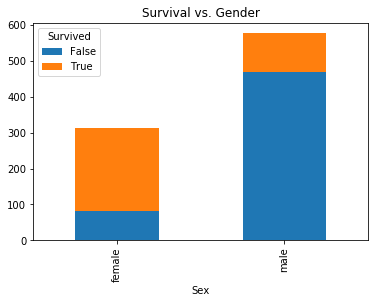

In [269]:

survived_sex_df.plot(kind='bar',stacked = True, title = 'Survival vs. Gender');


We can see from the Survival vs. Gender bar graph that Sex variable seems to be related to survived and that female, compared with male, tend to be survived in the titanic accident.

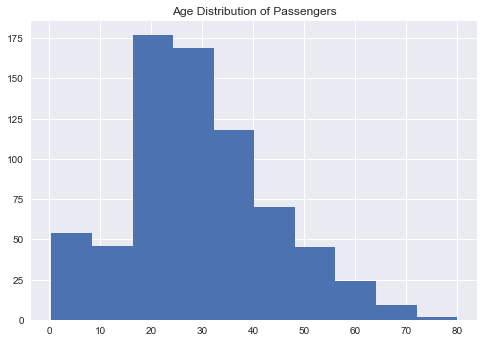

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [339]:
plt.hist(titanic['Age'].dropna(axis = 0, how = 'any'))
plt.title('Age Distribution of Passengers')
plt.show()
titanic['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


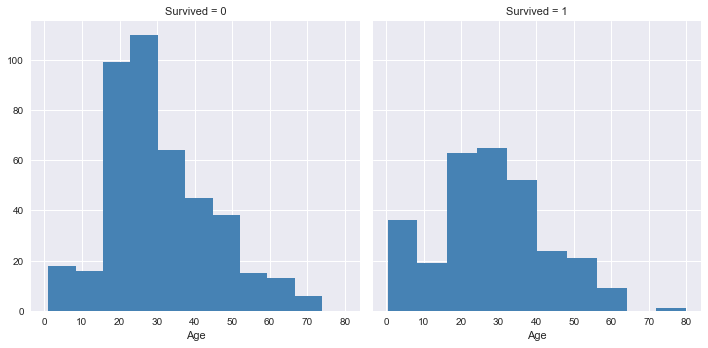

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(titanic,  col="Survived", margin_titles=True , size =5)

g.map(plt.hist, "Age", color="steelblue",  lw=0)
titanic.groupby('Survived').describe()['Age']

The summary of the age and survival and the three histgram graphs above show the passengers' age distribution for the survival and died. Both means are around 30 and standard deviations are about 14. 

In [342]:
titanic.groupby('Pclass').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


Compared the mean of three levels of passengers' class, we can find that the passengers' class seems to be closely related to survival. First class passengers tend to be survived in the titanic accident and the 3rd class passengers has a relatively low survival rate.

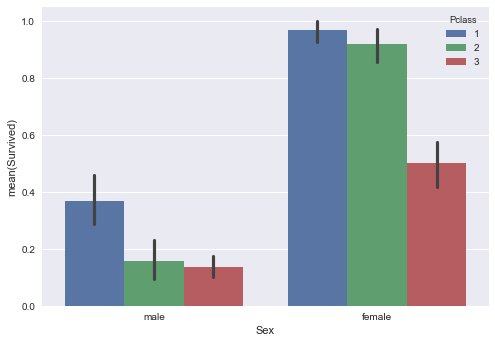

In [344]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic);

This bar graph proves that no matter what the passenger class is, there is a larger poossibility for female to survive in the titanic accident.

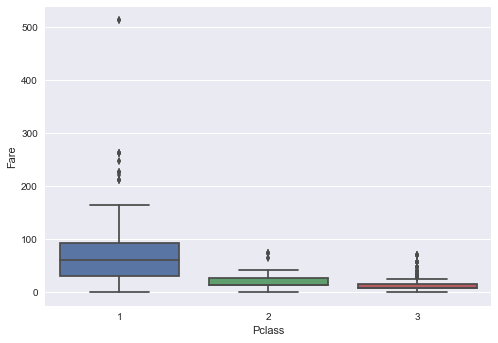

In [366]:
sns.boxplot(x="Pclass", y="Fare", data=titanic);

In [356]:
titanic.groupby('Pclass').describe()['Fare']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


The fare is closely related to passenger class. The first class passengers tend to have more expensive fares. 

In [368]:
titanic.groupby('SibSp').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,608.0,0.345395,0.475888,0.0,0.0,0.0,1.00,1.0
1,209.0,0.535885,0.499908,0.0,0.0,1.0,1.00,1.0
2,28.0,0.464286,0.507875,0.0,0.0,0.0,1.00,1.0
3,16.0,0.250000,0.447214,0.0,0.0,0.0,0.25,1.0
4,18.0,0.166667,0.383482,0.0,0.0,0.0,0.00,1.0
5,5.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
8,7.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [370]:
titanic.groupby('Parch').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Parch,,,,,,,,
0,678.0,0.343658,0.475279,0.0,0.0,0.0,1.0,1.0
1,118.0,0.550847,0.499529,0.0,0.0,1.0,1.0,1.0
2,80.0,0.500000,0.503155,0.0,0.0,0.5,1.0,1.0
3,5.0,0.600000,0.547723,0.0,0.0,1.0,1.0,1.0
4,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0
6,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


Summarizing the survival rate of passengers with siblings/spouse and childern/parents on board, we find that passengers having siblings/spouse or children/parents tend to be survived in the titanic.

## Conclusion


From the analysis above, we could get the following conclusions:
1. Compared to male, female tend to survive in the titanic accident.
2. First class passengers tend to survive, compared to 2nd class and 3rd class passengers.
3. The passengers that have children or parents with tend to survived.
4. The passengers having siblings/spouse or children/parents tend to be survived in the titanic.